In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import re
from collections import defaultdict
from collections import Counter 

In [135]:
# Import the test and train Dataset 

test = pd.read_csv('D:\HATHWAY ISP\DSC\Project\Housing\\test.csv')
train = pd.read_csv('D:\HATHWAY ISP\DSC\Project\Housing\\train.csv')

In [136]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [137]:
# Drop the Unwanted Feature STEP 1 
# ID ( columns/Feature ) has no meaning in the Given. So we drop this Feature 

train.drop('Id', axis = 1, inplace = True)

In [139]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


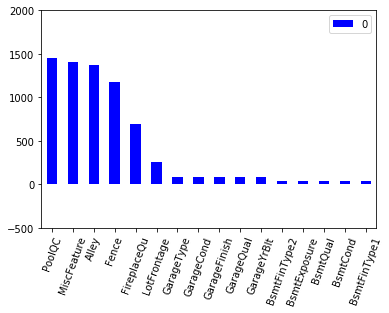

In [140]:
# Plot the Missing Values

t1 = train.isnull().sum().sort_values(ascending=False)[train.isnull().sum() > 10 ]
pd.DataFrame(t1).plot(kind='bar',rot=70, ylim=[-500,2000], xlim=[0,100], color='b')

In [141]:
# Drop the Unwanted Features STEP 2
# From above Plot feature 'PoolQC', 'MiscFeature', 'Fence', 'Alley', 
# 'FireplaceQu', 'LotFrontage' have contain lot of missing values ------ we will drop these features

Unwanted_features = ['PoolQC', 'MiscFeature', 'Fence', 'Alley', 'FireplaceQu', 'LotFrontage']

for Unwanted_feature in Unwanted_features:
    train.drop(Unwanted_feature, axis = 1, inplace = True)


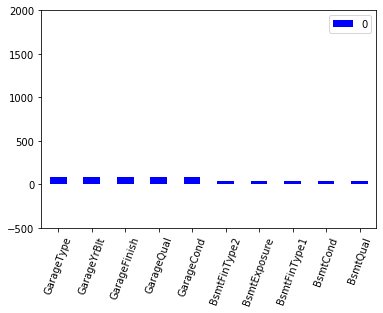

In [142]:
# Draw Missing Value Plot again to confirm 

t1 = train.isnull().sum().sort_values(ascending=False)[train.isnull().sum() > 10 ]
pd.DataFrame(t1).plot(kind='bar',rot=70, ylim=[-500,2000], xlim=[0,100], color='b')

In [143]:
# Do the Missing Value Treatment 
features = list(train.columns)

# Missing Value Treatment 1 -- Replace NaN with mean value of the feature 
#  OR 
# Missing Value Treatment 2 -- Replace NaN with most common value of the feature 

# Missing Value Treatment 1
#for i in features :
#    train[i] = train[i].fillna(train[i].mean) 

#  OR 

# Missing Value Treatment 2 -- this is suitable for both numerical and categorical features 

for i in features :
    CO = Counter(train[i])
    data , count = (CO.most_common(1)[0])
    train[i] = train[i].fillna(data)

In [144]:
# Check the NaN - Missing Values 
train[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
MasVnrArea       1460 non

In [118]:
# We Can apply the same set of command to test data also 

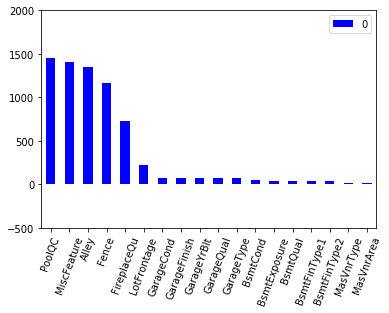

In [145]:
# Drop the Unwanted Feature STEP 1 

test.drop('Id', axis = 1, inplace = True)

# Plot the Missing Values
t1 = test.isnull().sum().sort_values(ascending=False)[test.isnull().sum() > 10 ]
pd.DataFrame(t1).plot(kind='bar',rot=70, ylim=[-500,2000], xlim=[0,100], color='b')

In [146]:
# Drop the Unwanted Features STEP 2
# From above Plot feature 'PoolQC', 'MiscFeature', 'Fence', 'Alley', 
# 'FireplaceQu', 'LotFrontage' have contain lot of missing values ------ we will drop these features

Unwanted_features = ['PoolQC', 'MiscFeature', 'Fence', 'Alley', 'FireplaceQu', 'LotFrontage']

for Unwanted_feature in Unwanted_features:
    test.drop(Unwanted_feature, axis = 1, inplace = True)

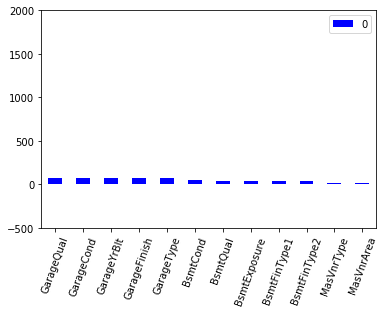

In [147]:
# Draw Missing Value Plot again to confirm 

t1 = test.isnull().sum().sort_values(ascending=False)[test.isnull().sum() > 10 ]
pd.DataFrame(t1).plot(kind='bar',rot=70, ylim=[-500,2000], xlim=[0,100], color='b')

In [150]:
# Do the Missing Value Treatment 
features = list(test.columns)

# Missing Value Treatment 1 -- Replace NaN with mean value of the feature 
#  OR 
# Missing Value Treatment 2 -- Replace NaN with most common value of the feature 

# Missing Value Treatment 1
#for i in features :
#    test[i] = test[i].fillna(test[i].mean) 

#  OR 

# Missing Value Treatment 2 -- this is suitable for both numerical and categorical features 

for i in features :
    CO = Counter(test[i])
    data , count = (CO.most_common(1)[0])
    test[i] = test[i].fillna(data)

In [151]:
test[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 73 columns):
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non-null object
MasVnrType       1459 non-null object
MasVnrArea       1459 non